## Import statements

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load and reshape the digits data

In [2]:
# load the data
digits = load_digits()

In [3]:
# shape of the data
digits.images.shape

(1797, 8, 8)

**Reshaping the data into 3D**

In [4]:
n_samples = len(digits.images)
image = digits.images.reshape((n_samples, -1))
image.shape

(1797, 64)

**Features & output of the data**

In [5]:
features = ["pixel"+str(i+1) for i in range(image.shape[1])]

In [6]:
output = 'label'

**Storing the data in pandas dataframe**

In [7]:
data = pd.DataFrame(image, columns=features)
data[output] = pd.Series(digits.target)
data.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


**Shuffling the data**

In [8]:
data = data.sample(frac=1, random_state = 0).reset_index(drop = True)

**Train test split of the data**

In [10]:
train_data, test_data = train_test_split(data, test_size = 0.25, random_state = 0)
X_train = train_data[features].values
y_train = train_data[output].values
X_test = test_data[features].values
y_test = test_data[output].values

# Accuracy of model trained using undecomposed data

**Create and fit SVM model**

In [11]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

**Compute accuracy of the model**

In [12]:
# compute prediction vector
preds = model.predict(X_test)
# calculate test accuracy
accuracy = accuracy_score(y_test, preds)
print("Accuracy: ", accuracy)

Accuracy:  0.9822222222222222


# Plot of Explained Variance vs Number of Components

In [13]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

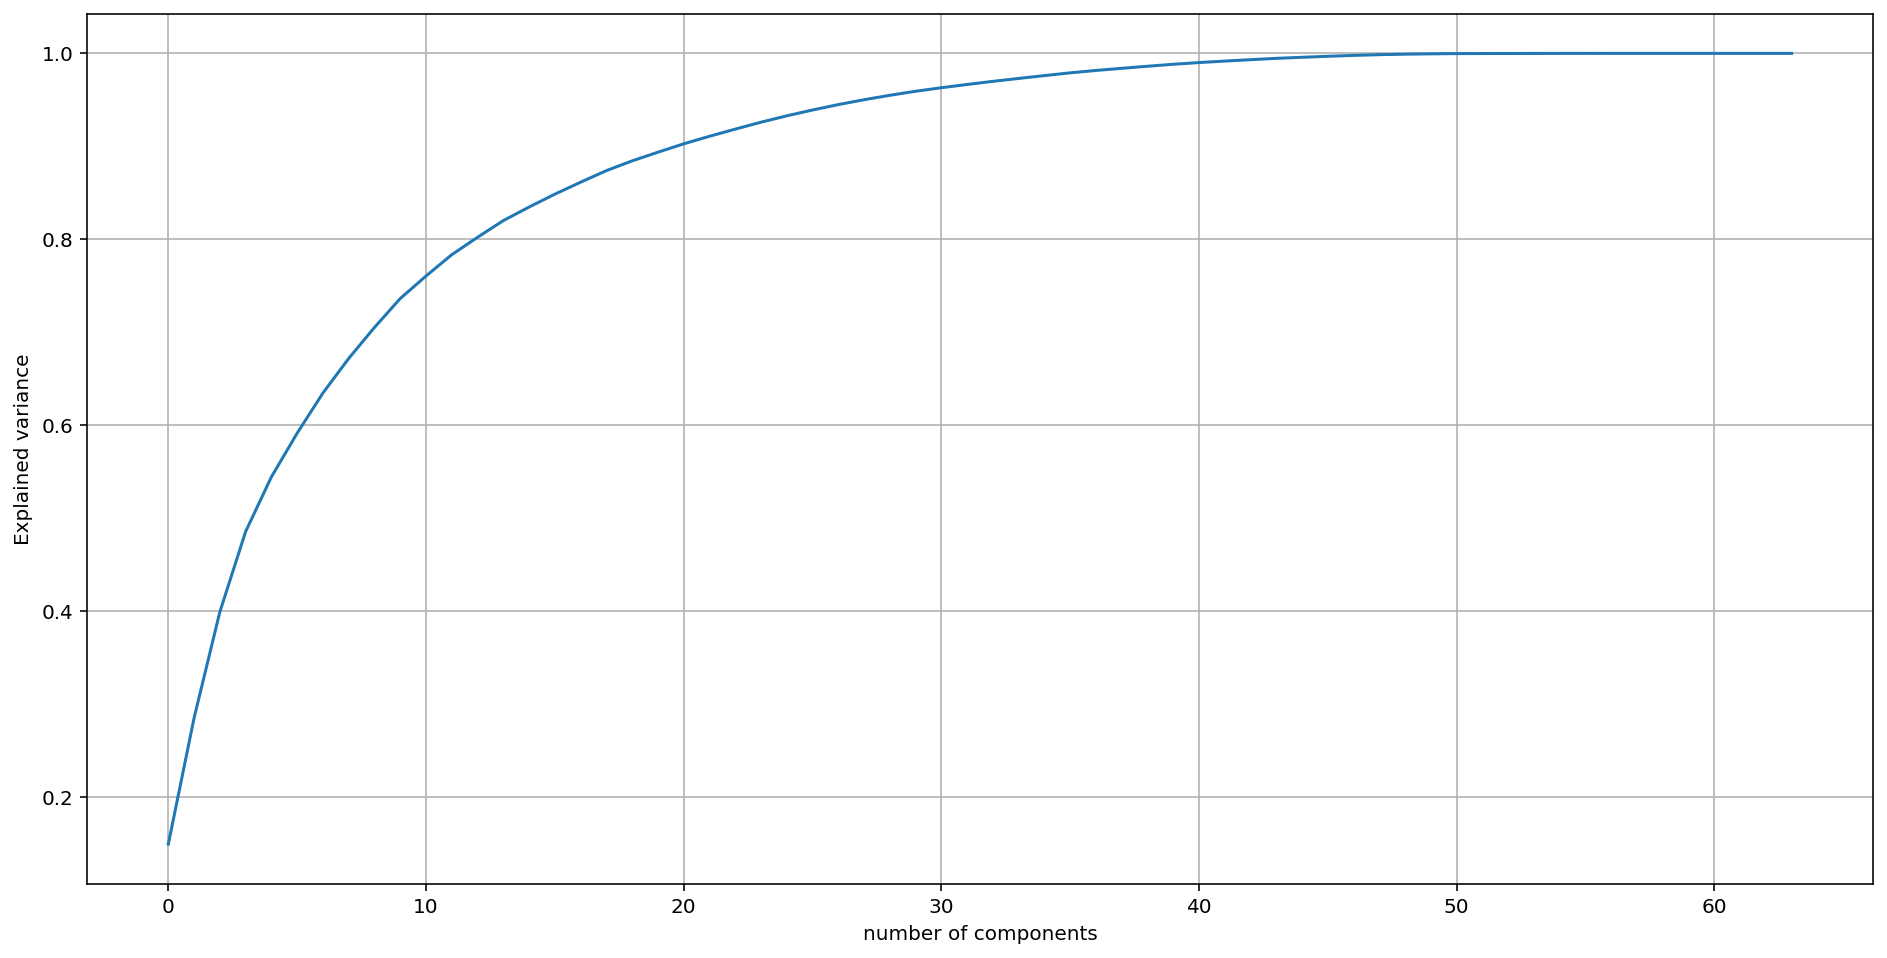

In [14]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
plt.plot(cumsum)
plt.xlabel("number of components")
plt.ylabel("Explained variance")
plt.grid()
plt.show()

# Investigate how number of components in PCA affects accuracy

**Create a list of n values to investigate**

In [15]:
n_list = np.linspace(5, 60,12,dtype=int)
n_list = n_list[::-1]
n_list = np.append(n_list, 2)
n_list

array([60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10,  5,  2])

### Decomposition of iris data into variable number of components

In [16]:
# a list to store the accuracy
accuracies = []

# iterate through each n
for n in n_list: 

    # decompose data into n components
    pca = PCA(n_components=n)
    pca.fit(X_train)
    
    # extract the reduced feature matrix of train and test set
    X_train_reduced = pca.transform(X_train)
    X_test_reduced = pca.transform(X_test)

    # fit an SVM model using reduced feature matrix of train set
    model = SVC(kernel='linear')
    model.fit(X_train_reduced, y_train)

    # calculate accuracy using reduced feature matrix of test set
    preds = model.predict(X_test_reduced)
    accuracy = accuracy_score(y_test, preds)
    accuracies.append(accuracy)
    
    # print the accuracy
    print("Accuracy with n = ",str(n), ": ", accuracy)

Accuracy with n =  60 :  0.9822222222222222
Accuracy with n =  55 :  0.9822222222222222
Accuracy with n =  50 :  0.9822222222222222
Accuracy with n =  45 :  0.9822222222222222
Accuracy with n =  40 :  0.9822222222222222
Accuracy with n =  35 :  0.9844444444444445
Accuracy with n =  30 :  0.9777777777777777
Accuracy with n =  25 :  0.98
Accuracy with n =  20 :  0.9666666666666667
Accuracy with n =  15 :  0.9711111111111111
Accuracy with n =  10 :  0.9555555555555556
Accuracy with n =  5 :  0.8822222222222222
Accuracy with n =  2 :  0.6488888888888888


**Plot of number of pca components vs accuracy**

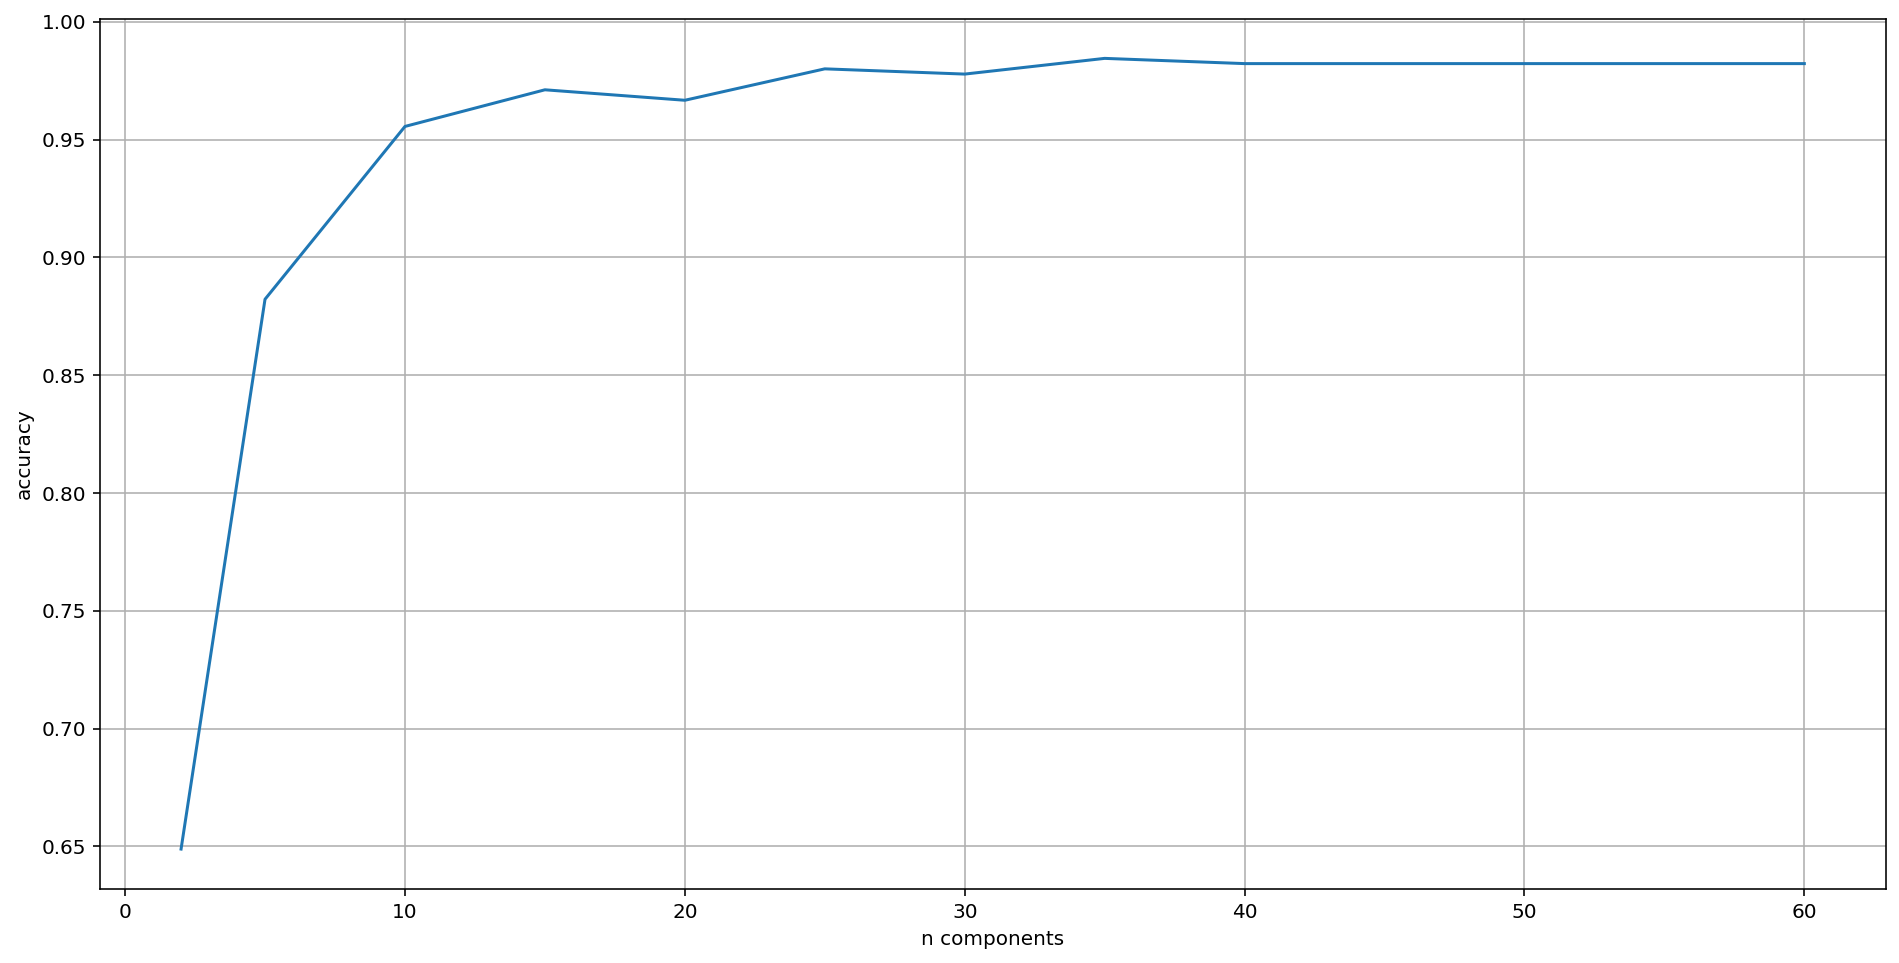

In [17]:
plt.plot(n_list, accuracies)
plt.xlabel("n components")
plt.ylabel("accuracy")
plt.grid()
plt.show()

# Visualization of Decomposed Data

### Visualizing decomposed 2D Data

**Decompose data**

In [18]:
# extracting the feature matrix and output vector
X = data[features]
y = data[output]

# decompose data into 2 components
pca = PCA(n_components=2)
pca.fit(X)

# compute the reduced feature matrix
X_reduced = pca.transform(X)

**Scatter plot of decomposed data**

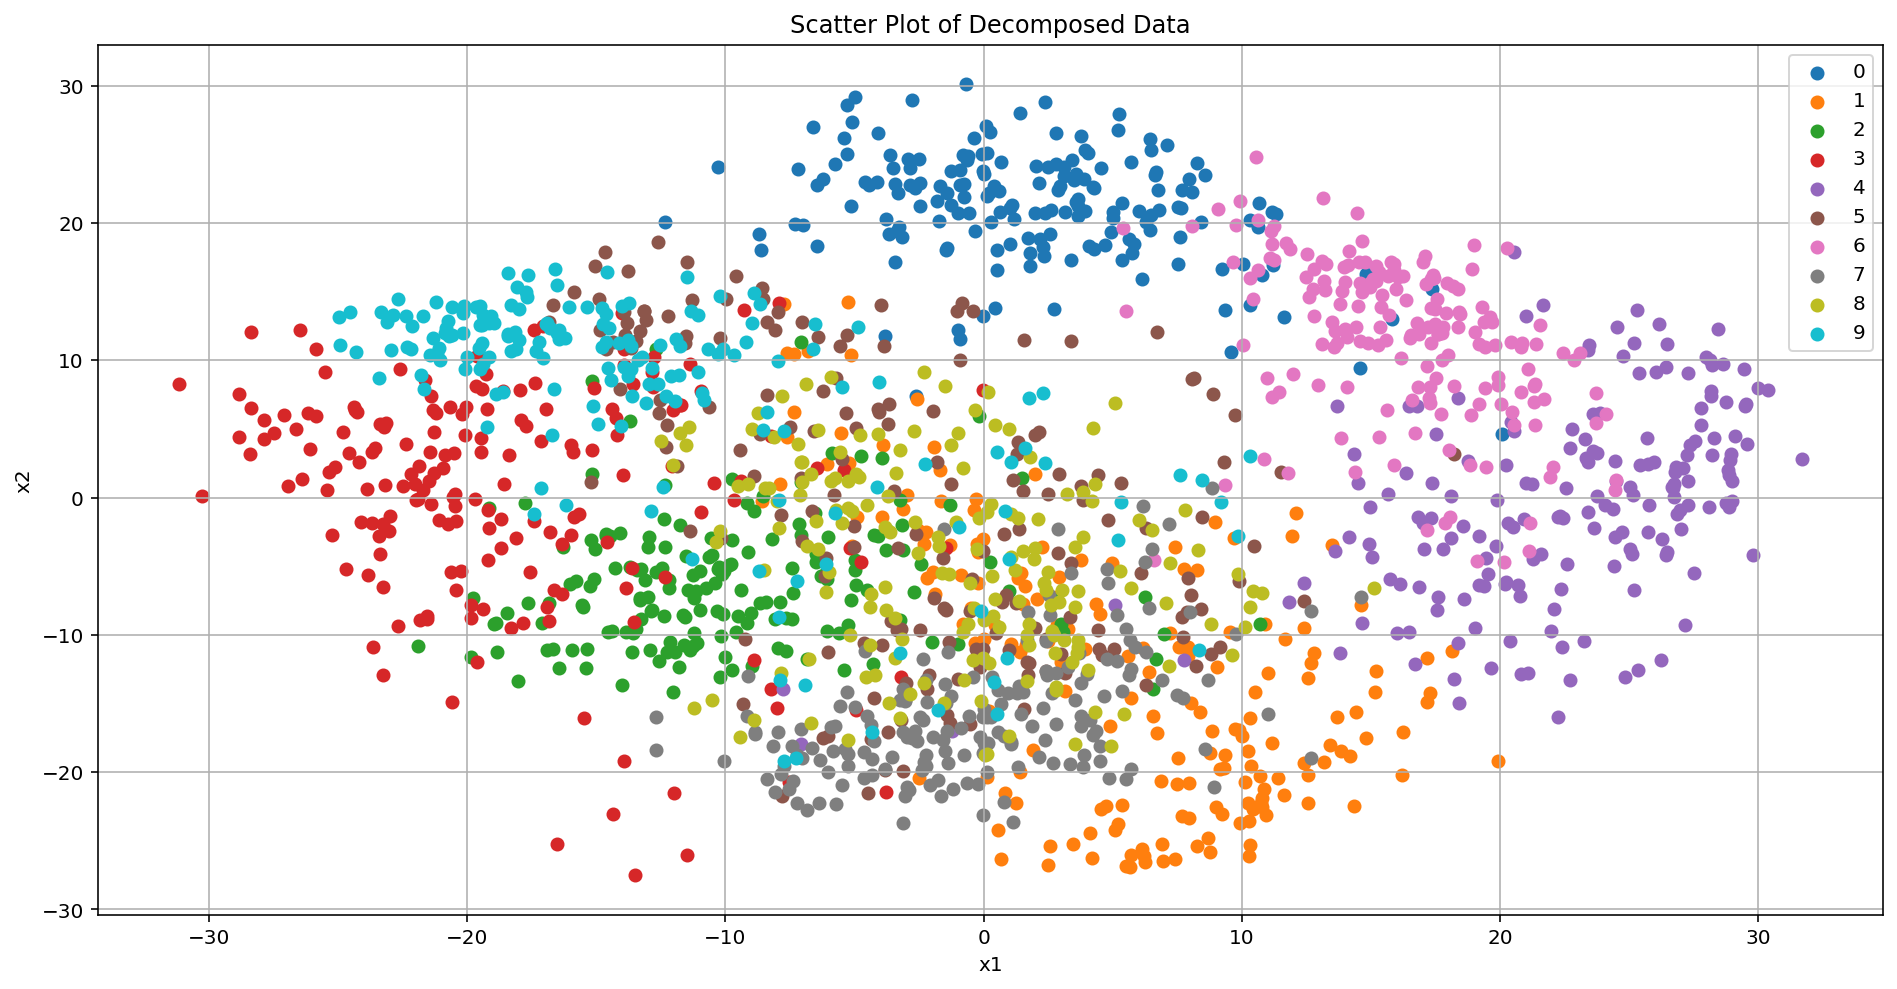

In [19]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
# extract the classes
classes = np.unique(y)
# iterate through each class of data and create a scatter plot
for i in classes:
    class_data = X_reduced[y == i]
    plt.scatter(class_data[:,0], class_data[:,1], label = str(i))
    
plt.legend()
plt.title("Scatter Plot of Decomposed Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

### Visualizing 3D Decomposed Data

**Decompose data**

In [20]:
# decompose data into 3 components
pca = PCA(n_components=3)
pca.fit(X)
# compute the reduced feature matrix
X_reduced = pca.transform(X)

**Scatter plot of decomposed data**

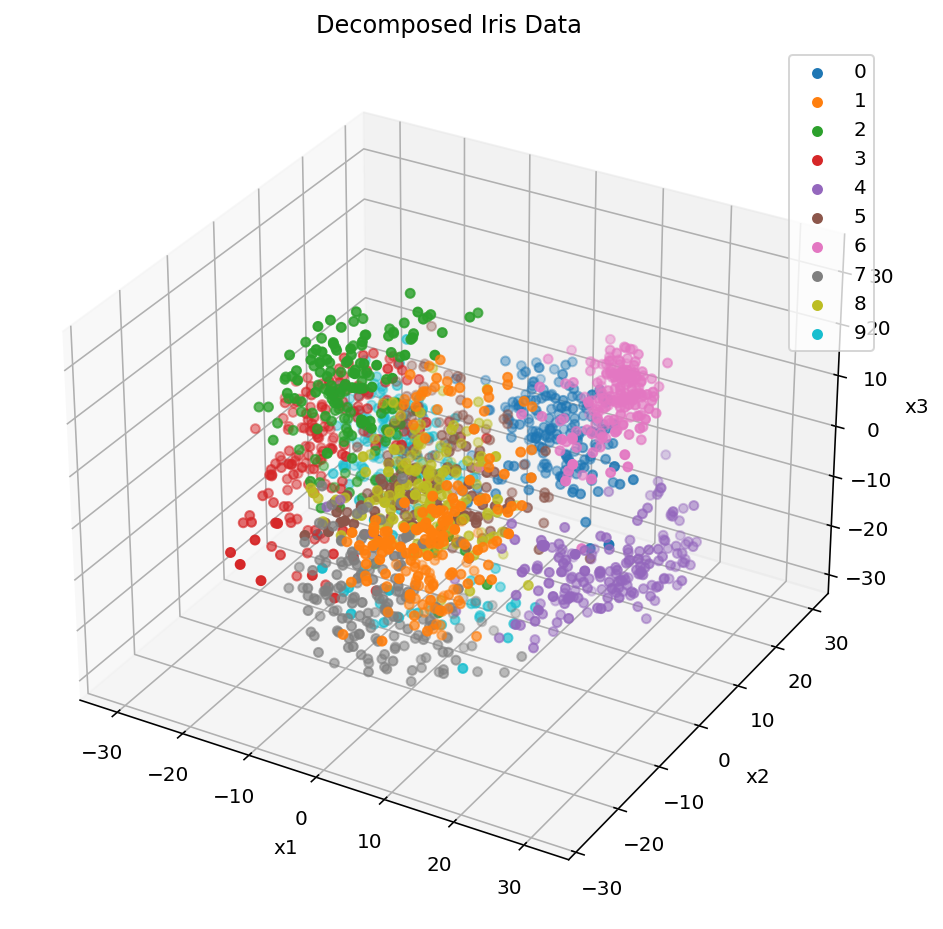

In [21]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
# extract the classes
classes = np.unique(y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# iterate through each class of data and create a scatter plot
for i in classes:
    class_data = X_reduced[y == i]
    ax.scatter(class_data[:,0], class_data[:,1], class_data[:,2], label = str(i))
    
ax.legend()
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.set_title("Decomposed Iris Data")
plt.show()